# Final Project Submission

Please fill out:

    Student name: Joseph Mangoka
        Student pace: Part time
            Scheduled project review date/time: 5th November 2023
                Instructor name: Samwel Jane
                    Blog post URL: http://localhost:8888/notebooks/dsc-phase-1-project/student.ipynb
                                

## Exploratory Data Analysis With Movies: Phase 1 Data Science Project


## Project Overview

Nowadays companies are beginning to realize the importance of data availability in large amounts which allows them to infer meaningful results and make informed business decisions. With development of new technologies, Internet and social networks, production of digital data is constantly growing. To get the most out of data, a robust and thorough data analysis process is needed. This project uses exploratory data analysis to generate insights from the movie industry for use by Microsoft Company.


## Business Problem

Microsoft wants to join the movie industry, however they have no prior knowledge of the industry and they need help so that their movie studio can be successful. This project is aimed at exploring what types of films are currently doing the best at the box office then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data preprocessing

Data was obtained from several sources namely; Box Office Mojo, IMDB, Rotten Tomatoes,TheMovieDB and The Numbers.
Analytics tools were used to convert the data into an easy to process format.


In [58]:
#Importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
#Extracting data files

movie = pd.read_csv("zippedData/bom.movie_gross.csv")

title_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")

title_basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

After importing data into Pandas DataFrames, a list of all data frames was created and a for loop used to preview the first 5 rows of data. This gave a glimpse of the number of rows with values, column names, and data types for each data frame



In [60]:
# for loop to preview the first 5 rows of data

all_dfs = [movie, title_ratings, title_basics]
df_names = ["movie", "title_ratings", "title_basics"]
for i in range(len(all_dfs)):
    print(df_names[i], '\n')
    display(all_dfs[i].info())
    display(all_dfs[i].head())

movie 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


title_ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


title_basics 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Data Cleaning
Data cleaning is essential before carrying out data analysis as it ensures accuracy of the analysis, maintains consistency in the dataset, enhances data quality and streamlines the data processing pipeline, saving time and resources.

In [61]:
#locating missing values

movie.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [62]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [63]:
title_basics.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [64]:
#replacing the NaN values with median value
#median value is least likely to influence the distribution of the dataset

movie['domestic_gross'].fillna(movie.domestic_gross.median(), inplace=True)
movie['foreign_gross'].fillna(movie.domestic_gross.median(), inplace=True)
movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,1400000.0,2018
3384,El Pacto,Sony,2500.0,1400000.0,2018
3385,The Swan,Synergetic,2400.0,1400000.0,2018


In [65]:
#Remove extraneous comma 

movie['foreign_gross'].replace(',', '', regex=True, inplace=True)

#Change foreign_gross to float64

movie['foreign_gross'] = movie['foreign_gross'].astype('float64')

In [66]:
movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1400000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,1400000.0,2018
3384,El Pacto,Sony,2500.0,1400000.0,2018
3385,The Swan,Synergetic,2400.0,1400000.0,2018


In [67]:
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [68]:
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [69]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [70]:
#Convert into correct date format
df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.to_string())

       id release_date                                                                                   movie production_budget domestic_gross worldwide_gross
0       1   2009-12-18                                                                                  Avatar      $425,000,000   $760,507,625  $2,776,345,279
1       2   2011-05-20                                             Pirates of the Caribbean: On Stranger Tides      $410,600,000   $241,063,875  $1,045,663,875
2       3   2019-06-07                                                                            Dark Phoenix      $350,000,000    $42,762,350    $149,762,350
3       4   2015-05-01                                                                 Avengers: Age of Ultron      $330,600,000   $459,005,868  $1,403,013,963
4       5   2017-12-15                                                       Star Wars Ep. VIII: The Last Jedi      $317,000,000   $620,181,382  $1,316,721,747
5       6   2015-12-18                  

In [71]:
#Removing Rows
df.dropna(subset =['release_date'], inplace = True)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495"
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0


In [72]:
#Extract month from the datetime object
df['month'] = df['release_date'].apply(lambda r:r.month)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,12
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",4
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",7
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,9


In [73]:
#removing extraneous commas
df['worldwide_gross'] = df['worldwide_gross'].replace({',':''}, regex = True)
df['domestic_gross'] = df['domestic_gross'].replace({',':''}, regex = True)
df['production_budget'] = df['production_budget'].replace({',':''}, regex = True)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,2009-12-18,Avatar,$425000000,$760507625,$2776345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,$410600000,$241063875,$1045663875,5
2,3,2019-06-07,Dark Phoenix,$350000000,$42762350,$149762350,6
3,4,2015-05-01,Avengers: Age of Ultron,$330600000,$459005868,$1403013963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,$317000000,$620181382,$1316721747,12
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,$7000,$0,$0,12
5778,79,1999-04-02,Following,$6000,$48482,$240495,4
5779,80,2005-07-13,Return to the Land of Wonders,$5000,$1338,$1338,7
5780,81,2015-09-29,A Plague So Pleasant,$1400,$0,$0,9


In [74]:
#Remove $ sign

df['worldwide_gross'] = df['worldwide_gross'].replace({r'\$':''}, regex = True)
df['domestic_gross'] = df['domestic_gross'].replace({r'\$':''}, regex = True)
df['production_budget'] = df['production_budget'].replace({r'\$':''}, regex = True)

#Change foreign_gross to float64

df['worldwide_gross'] = df['worldwide_gross'].astype('float64')
df['domestic_gross'] = df['domestic_gross'].astype('float64')
df['production_budget'] = df['production_budget'].astype('float64')

df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9


## Joining Movie Title and Ratings data

In [75]:
joined_df = title_basics.set_index('tconst').join(title_ratings.set_index('tconst'))
joined_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


# Sorting the data

In [76]:
joined_df_votes = joined_df.sort_values('averagerating')
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [77]:
#checking missing values
joined_df_votes.isnull().sum()

primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

# Dropping missing values

In [78]:
joined_df_votes = joined_df_votes.dropna()
joined_df_votes

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5.0
tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223.0
tt5277828,Death Forest 3,Death Forest 3,2015,64.0,Horror,1.0,268.0
tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449.0
tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21.0
...,...,...,...,...,...,...,...
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0


## Highest rating

In [79]:
Highest_rating = joined_df_votes.tail(10)
Highest_rating

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5.0
tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8.0
tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5.0
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7.0
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0


## Genres and average rating

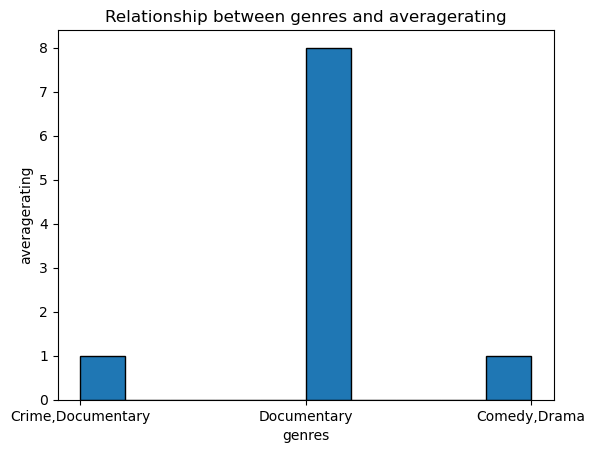

In [80]:
x = joined_df_votes['genres'].tail(10)
y = joined_df_votes['averagerating'].tail(10)
plt.hist(x, bins = 10, edgecolor='black')

plt.xlabel('genres')
plt.ylabel('averagerating')
plt.title('Relationship between genres and averagerating')
plt.show()

From the analysis, Documentaries had the highest average rating.

# Relationship between movie runtime_minutes and averagerating

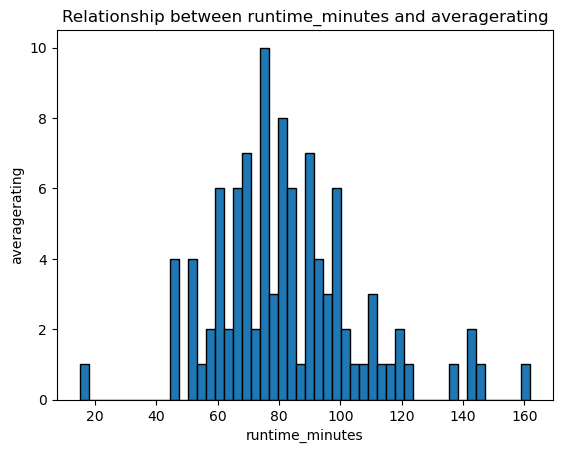

In [81]:
x = joined_df_votes['runtime_minutes'].head(100)
y = joined_df_votes['averagerating'].head(100)
plt.hist(x, bins = 50, edgecolor='black')

plt.xlabel('runtime_minutes')
plt.ylabel('averagerating')
plt.title('Relationship between runtime_minutes and averagerating')
plt.show()

From the above histogram,its noted that movies with average runtime minutes have the highest rating

# Top current competitor foreign gross revenues

Analysis looked at the success of top studios with high revenue generation and potential competitors we should emulate for best practices


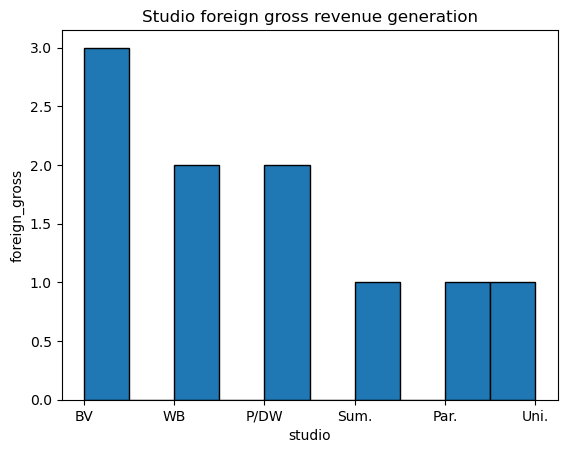

In [82]:
x = movie['studio'].head(10)
y = movie['foreign_gross'].head(10)
plt.hist(x, bins = 10, edgecolor='black')

plt.xlabel('studio')
plt.ylabel('foreign_gross')
plt.title('Studio foreign gross revenue generation')
plt.show()

# Preferred months of the year to release a movie

This was done by converting the dates from the movie_budgets dataframe to a datetime object. I then did a count by month to see the number of movies released in each month.


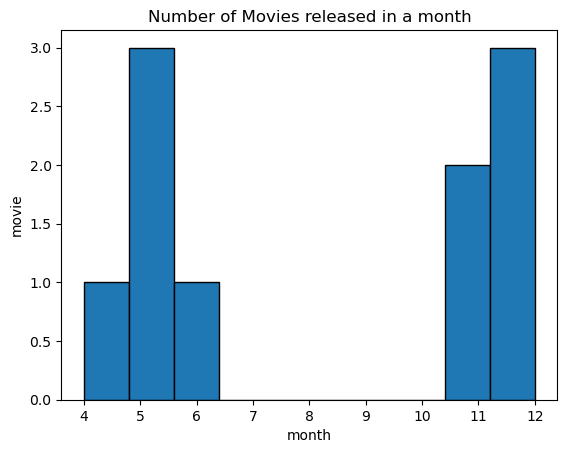

In [83]:
x = df['month'].head(10)
y = df['movie'].head(10)
plt.hist(x, bins = 10, edgecolor='black')

plt.xlabel('month')
plt.ylabel('movie')
plt.title('Number of Movies released in a month')
plt.show()

From the analysis highest number of movies are produced in the months of May and December

# Most profitable movies

I did an analysis on the movies in terms of profit to understand their financial success and how closely Microsoft should attempt to emulate their budget. 

In [84]:
df['Profit'] = df['worldwide_gross'] - df['production_budget']

df['Profit_Margin'] = (df['worldwide_gross'] - 
                                    df['production_budget'])/df['worldwide_gross']
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Profit,Profit_Margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2.351345e+09,0.846921
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,6.350639e+08,0.607331
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-2.002376e+08,-1.337036
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,1.072414e+09,0.764364
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,9.997217e+08,0.759251
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,12,1.747311e+09,0.850972
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,1.748134e+09,0.853525
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,5,6.634204e+08,0.688609
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,11,3.559452e+08,0.542645
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,11,5.796209e+08,0.658944


In [85]:
#Top ten movies with highest profits
df = df.sort_values(['Profit'], ascending=[False])
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Profit,Profit_Margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2.351345e+09,0.846921
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,12,2.008208e+09,0.909429
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,1.748134e+09,0.853525
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,12,1.747311e+09,0.850972
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,6,1.433855e+09,0.869606
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,4,1.328723e+09,0.874895
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5,1.292936e+09,0.851772
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,7,1.216693e+09,0.906834
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2,1.148258e+09,0.851660
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,6,1.135773e+09,0.869809


In [86]:
#Top ten movies with highest profit margin
df = df.sort_values(['Profit_Margin'], ascending=[False])
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Profit,Profit_Margin
5745,46,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,6,44975000.0,0.999444
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,3,99550000.0,0.997995
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,9,193733034.0,0.997683
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,7,41556474.0,0.997599
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,7,247700000.0,0.997584
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,5,22168808.0,0.997077
5346,47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,8,267142000.0,0.996799
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,2,2034928.0,0.996572
5676,77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,10,29973064.0,0.996211
5210,11,1976-11-21,Rocky,1000000.0,117235147.0,225000000.0,11,224000000.0,0.995556


In [87]:
#Top ten movies with highest production budget
df = df.sort_values(['production_budget'], ascending=[False])
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Profit,Profit_Margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2.351345e+09,0.846921
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,6.350639e+08,0.607331
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,-2.002376e+08,-1.337036
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,1.072414e+09,0.764364
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,9.997217e+08,0.759251
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,12,1.747311e+09,0.850972
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,5,6.634204e+08,0.688609
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,1.748134e+09,0.853525
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,11,5.796209e+08,0.658944
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,11,3.559452e+08,0.542645


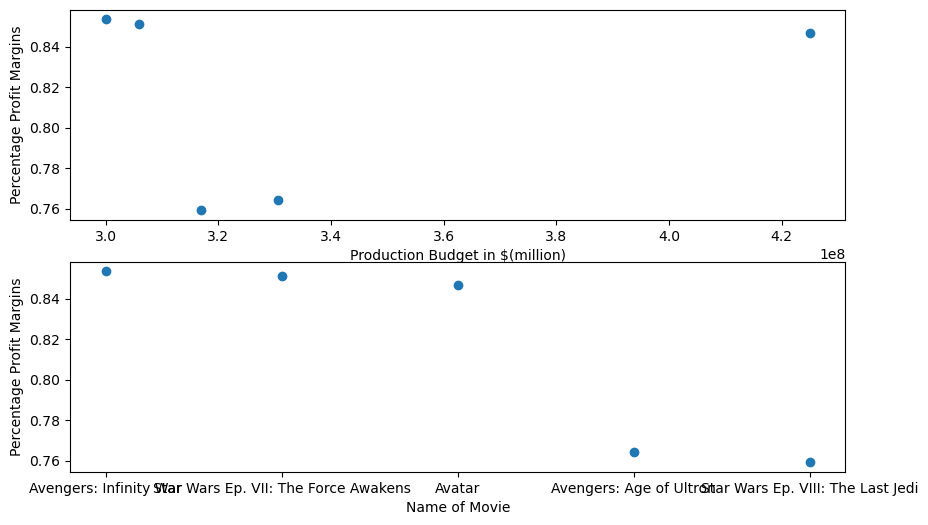

In [126]:
df = df.sort_values(['Profit_Margin'], ascending=[False]).head(20)

fig, ax = plt.subplots(2, figsize=(10, 6))
                       
ax[0].scatter(x = df['production_budget'], y = df['Profit_Margin'])
ax[0].set_xlabel('Production Budget in $(million)')
ax[0].set_ylabel('Percentage Profit Margins') 

ax[1].scatter(x = df['movie'], y = df['Profit_Margin'])
ax[1].set_xlabel('Name of Movie')
ax[1].set_ylabel('Percentage Profit Margins') 

plt.show()


Microsoft should budget at least $300M for a movie and that budget should correlate with a profit margin of 85%.
Microsoft should attempt to emulate Avengers budget which yields profit Margin of 85%
Avatar Movies have the highest production budget but generates a profit margin 0f 84%

# Conclusion

Microsoft should take into consideration the rating of their movies based on genre and average runtime minutes as they have highest ratings

## Recommendations

From the data analysis i recommend that Microsoft;

Releases the bulk of their movies in May and December

Consider Documentaries as they have the highest ratings

Should budget at least $300M for a movie and that budget should correlate with a profit margin of 85%.

Interrogate Deep Throat movies to understand the concepts and success in achieving highest profit margins

Learn from BV studios who will be their top competitor in terms of foreign gross revenues

## Next steps
Exploratory Analysis was used to make recommendations for this project. However, there exists other data analysis methods that can be used to make more accurate recommendations like linear regression models to predict profits based upon one or more variables.Being an introductory project in the  data science learning process, it would be exciting to revisit the data after gaining more data science skills to improve on current recommendations